Chapter 32
# kNN分类
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [6]:
# 导入并整理数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)

In [10]:
# 创建色谱
rgb = [[255, 238, 255], [219, 238, 244], [228, 228, 228]]
rgb = np.array(rgb)/255.
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255], [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

In [11]:
k_neighbors = 4 # 定义kNN近邻数量k
# 创建kNN分类器对象
kNN = neighbors.KNeighborsClassifier(k_neighbors)
kNN.fit(X, y) # 用训练数据训练kNN

KNeighborsClassifier(n_neighbors=4)

In [9]:
q = np.c_[xx1.ravel(), xx2.ravel()]
# 用kNN对一系列查询点进行预测
y_predict = kNN.predict(q)
y_predict = y_predict.reshape(xx1.shape)

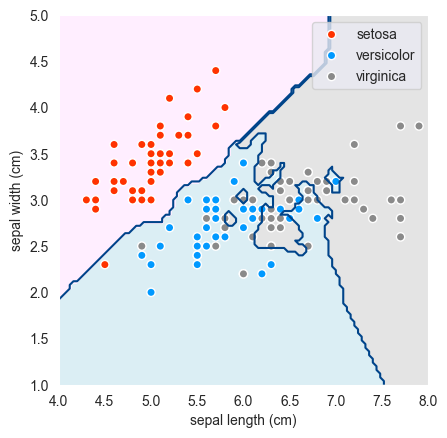

In [29]:
# 可视化
fig, ax = plt.subplots()
# 绘制分类区域
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)
# 绘制分类决策边界
plt.contour(xx1, xx2, y_predict, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)
# 绘制散点图
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    ax=ax,
    palette=dict(setosa=cmap_bold[0,:], versicolor=cmap_bold[1,:], virginica=cmap_bold[2,:]),
    alpha=1.0,
    linewidth=1,
    edgecolor=[1,1,1]
)
plt.xlim(4, 8); plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0]); plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')